In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv, DataFrame, concat

import os
path='E:\【ML_DL】\【服装项目】\dataset\shopN\data\shop_'

销售数据取自data_full.7z中的'sale_XXX.csv'系列csv文件，将所有sale数据进行合并。一共有638家店铺，其中取出：拥有数据数目大于100条可以用于lstm时序预测、以及日期可以满足预测条件的店铺，用shop_newest_len100表示       

In [2]:
shop_newest_len100 = [1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 52, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 69, 70, 72, 75, 76, 77, 78, 81, 83, 85, 86, 88, 89, 90, 91, 93, 94, 95, 100, 101, 105, 106, 107, 110, 111, 114, 115, 121, 122, 125, 127, 128, 132, 133, 134, 135, 146, 147, 151, 156, 157, 158, 159, 160, 162, 163, 164, 167, 169, 170, 172, 178, 179, 183, 185, 186, 189, 196, 199, 200, 201, 205, 206, 209, 218, 221, 223, 225, 233, 234, 237, 239, 246, 250, 260, 272, 299, 308, 311, 321, 451, 481]

保存每个店铺的数据长度

In [3]:
shop_length = []# 保存每个店铺的数据长度
for id in shop_newest_len100:
    df = pd.read_csv(path+str(id)+'.csv',low_memory=False)
    shop_length.append(len(df))

In [4]:
shop_length[:10]

[225, 558, 558, 446, 366, 331, 513, 177, 362, 497]

这里随机选取第3个店铺进行展示

In [2]:
id = 3# 这里随机选取第7个店铺进行展示
df = pd.read_csv(path+str(id)+'.csv',low_memory=False)
# df=df.drop(['sale_date'],axis=1)
len(df)

558

In [3]:
df[:5]

,sale_date,sale_price,Quantity
0,2008-02-25,11498.0,32.0
1,2008-03-03,39564.0,112.0
2,2008-03-10,35512.0,93.0
3,2008-03-17,54505.0,166.0
4,2008-03-24,29449.0,120.0


In [4]:
df['sale_date']=pd.to_datetime(df['sale_date'], format="%Y/%m/%d")
df.set_index('sale_date', inplace=True)

In [5]:
df = df.resample('m').sum()

In [6]:
df[:5]

,sale_price,Quantity
sale_date,,
2008-02-29,11498.0,32.0
2008-03-31,205379.0,650.0
2008-04-30,109691.0,401.0
2008-05-31,7447.0,29.0
2008-06-30,209109.0,941.0


In [7]:
len(df)

129

##### 进行简单的拟合来预测月销售额

误差计算

In [8]:
# 定义相对误差的计算
def mean_squared_error01(a,b):
    e=[]
    for i in range(len(a)):
        dif = a[i]-b[i]
        e1 = abs(dif / b[i])
        e.append(e1)
    return e

进行简单的线性拟合

In [9]:
x = df['Quantity'][:(len(df)-10)].values
Y = df['sale_price'][:(len(df)-10)].values

 
406.4 x + 7.679e+04


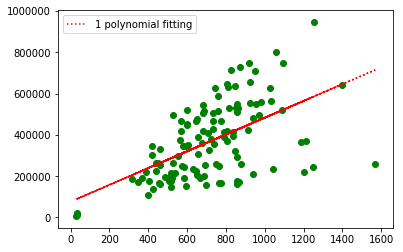

In [10]:
coef1 = np.polyfit(x,Y, 1)
poly_fit1 = np.poly1d(coef1)
plt.plot(x, poly_fit1(x), 'r:',label="1 polynomial fitting")
print(poly_fit1)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

In [11]:
y_true = df['sale_price'][(len(df)-10):].values
y_true

array([583319., 470576., 399533., 523714., 331006., 303927., 318555.,
       359869., 348865., 445290.])

In [12]:
y_pred = poly_fit1(df['Quantity'][(len(df)-10):].values)
y_pred

array([329175.93896037, 314545.03540904, 339742.70263633, 444597.51142086,
       342587.60054909, 350309.46631229, 369004.50973899, 329175.93896037,
       329175.93896037, 352341.53624998])

In [13]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.23418349564583965

进行简单的二阶拟合

         2
-0.3761 x + 966.9 x - 1.077e+05


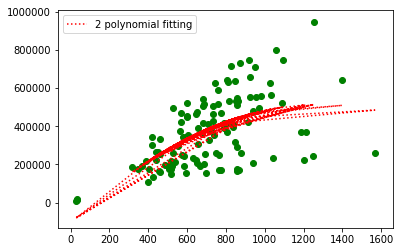

In [14]:
coef2 = np.polyfit(x,Y, 2)
poly_fit2 = np.poly1d(coef2)
plt.plot(x, poly_fit2(x), 'r:',label="2 polynomial fitting")
print(poly_fit2)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

In [15]:
y_true = df['sale_price'][(len(df)-10):].values
y_true

array([583319., 470576., 399533., 523714., 331006., 303927., 318555.,
       359869., 348865., 445290.])

In [16]:
y_pred = poly_fit2(df['Quantity'][(len(df)-10):].values)
y_pred

array([347737.93561907, 329257.91436859, 360478.31417244, 459343.09590626,
       363821.53265426, 372710.18014572, 393105.46841707, 347737.93561907,
       347737.93561907, 375004.16365396])

In [17]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.2045091244167056

三阶多项式拟合

           3          2
-0.000526 x + 0.8045 x + 221.6 x + 1.257e+04


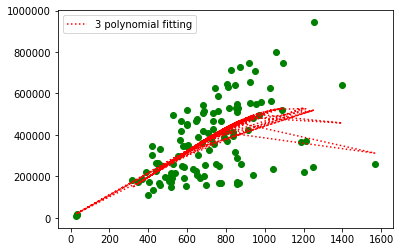

In [18]:
coef3 = np.polyfit(x,Y, 3)
poly_fit3 = np.poly1d(coef3)
plt.plot(x, poly_fit3(x), 'r:',label="3 polynomial fitting")
print(poly_fit3)

plt.scatter(x, Y, color='green')
plt.legend(loc=2)
plt.show()

In [19]:
y_pred = poly_fit3(df['Quantity'][(len(df)-10):].values)
y_pred

array([334462.7324815 , 312220.54433477, 350252.07210727, 482121.59483371,
       354455.33316378, 365748.63208269, 392277.66258904, 334462.7324815 ,
       334462.7324815 , 368690.5265813 ])

In [20]:
average_error = sum(mean_squared_error01(y_true,y_pred))/len(y_true)
average_error

0.22281114282485853